# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [96]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Import API key from a file that is ignored by Git (.gitignore file) so the key isn't exposed to the public
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [97]:
!pip install citipy

## Generate Cities List

In [98]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations and zip into a list of tuples
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination using the Citypy package to return a unique city and country code
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Combine the two lists into a list of tuples using the zip function
city_country = zip(cities,countries)

# Print the city count to confirm sufficient count ( Greater than 500 )
print(len(cities))

599


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [99]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# set up lists to hold reponse info
city_id = []
city_name = []
country = []
latitude = []
longitude = []
weather_date = []
temp = []
humidity = []
cloudiness = []
wind_speed = []



# Loop through the list of tuples of cities,country codes and perform a request for data on each
for city,country_code in city_country:
    query_url = f"{url}appid={weather_api_key}&q={city},{country_code}&units={units}"
    response = requests.get(query_url).json()

    # Try to grab the temp,humidity,cloudiness and wind speed if they are available in the Weather API
    # if the city is not found on the WeatherAPI site then the "except" will catch the error and the loop will
    # continue to go through the rest of the city,country_codes in the city_country list
    try:
        # Create variables for each response item and format to desired datatype
        cityID = int(response['id'])
        cityName = response['name']
        countryCode = response['sys']['country']
        lat_val = response['coord']['lat']
        lon_val = response['coord']['lon']
        weatherDate = (datetime.fromtimestamp(response['dt'])).strftime('%m/%d/%y')
        temperature = response['main']['temp']
        humidity_val = response['main']['humidity']
        cloudiness_val = response['clouds']['all']
        windSpeed = response['wind']['speed']
        
        # Append retreived values to lists above using the variables created above
        city_id.append(cityID)
        city_name.append(cityName)
        country.append(countryCode)
        latitude.append(lat_val)
        longitude.append(lon_val)
        weather_date.append(weatherDate)
        temp.append(temperature)
        humidity.append(humidity_val)
        cloudiness.append(cloudiness_val)
        wind_speed.append(windSpeed)
        
        # Output line to terminal to mark progress and store it to a print log text file
        print(f"{cityName} with city ID:{cityID} was found in the Weathermap API\n")
        myprintlog.write(f"{cityName} with city ID:{cityID} was found in the Weathermap API\n")
        
    
        
    # Handle exceptions for a city that is not available in the Weather API
    except:
        
        print(f"{city},{country_code} was not found in the Weathermap API\n")
        myprintlog.write(f"{city},{country_code} was not found in the Weathermap API\n")
        
        # Append null values so lists are all the same length (later we will remove nulls from dataframe)
        city_id.append(None)
        city_name.append(None)
        country.append(None)
        latitude.append(None)
        longitude.append(None)
        weather_date.append(None)
        temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind_speed.append(None)
        pass


Half Moon Bay with city ID:5354943 was found in the Weathermap API

Iqaluit with city ID:5983720 was found in the Weathermap API

Ushuaia with city ID:3833367 was found in the Weathermap API

New Norfolk with city ID:2155415 was found in the Weathermap API

Georgetown with city ID:2411397 was found in the Weathermap API

Hobart with city ID:2163355 was found in the Weathermap API

Mafinga with city ID:155405 was found in the Weathermap API

airai,pw was not found in the Weathermap API

Natal with city ID:3394023 was found in the Weathermap API

Busselton with city ID:2075265 was found in the Weathermap API

saleaula,ws was not found in the Weathermap API

Hilo with city ID:5855927 was found in the Weathermap API

Albany with city ID:2077963 was found in the Weathermap API

bolshiye berezniki,ru was not found in the Weathermap API

Niquelândia with city ID:3456285 was found in the Weathermap API

Rikitea with city ID:4030556 was found in the Weathermap API

Neuquén with city ID:3843123 

tumannyy,ru was not found in the Weathermap API

Mao with city ID:2428394 was found in the Weathermap API

Coquimbo with city ID:3893629 was found in the Weathermap API

East London with city ID:1006984 was found in the Weathermap API

Samsun Province with city ID:740263 was found in the Weathermap API

Bengkulu with city ID:1649150 was found in the Weathermap API

Broken Hill with city ID:2173911 was found in the Weathermap API

Beloha with city ID:1067565 was found in the Weathermap API

Roald with city ID:3141667 was found in the Weathermap API

Flin Flon with city ID:5954718 was found in the Weathermap API

Saint-Pierre with city ID:935214 was found in the Weathermap API

Kaduqli with city ID:373141 was found in the Weathermap API

Kaitangata with city ID:2208248 was found in the Weathermap API

Srednekolymsk with city ID:2121025 was found in the Weathermap API

Chokurdakh with city ID:2126123 was found in the Weathermap API

São Filipe with city ID:3374210 was found in the Weather

Yerbogachën with city ID:2012956 was found in the Weathermap API

Santarém with city ID:3389353 was found in the Weathermap API

Zolotkovo with city ID:462203 was found in the Weathermap API

Muli with city ID:1337617 was found in the Weathermap API

Koson with city ID:1217007 was found in the Weathermap API

Ballina with city ID:2177069 was found in the Weathermap API

Tiarei with city ID:4033356 was found in the Weathermap API

Lompoc with city ID:5367788 was found in the Weathermap API

Ebetsu with city ID:2130404 was found in the Weathermap API

Kemisē with city ID:333356 was found in the Weathermap API

kemise,et was not found in the Weathermap API

Cabo San Lucas with city ID:3985710 was found in the Weathermap API

São João da Barra with city ID:3448903 was found in the Weathermap API

Pangai with city ID:4032369 was found in the Weathermap API

kegayli,uz was not found in the Weathermap API

Derzhavīnsk with city ID:1524606 was found in the Weathermap API

derzhavinsk,kz was no

Ukiah with city ID:5404476 was found in the Weathermap API

Broome with city ID:2075720 was found in the Weathermap API

puerto pinasco,py was not found in the Weathermap API

saint anthony,ca was not found in the Weathermap API

palabuhanratu,id was not found in the Weathermap API

Rūdbār with city ID:1128239 was found in the Weathermap API

rudbar,af was not found in the Weathermap API

Wakkanai with city ID:2127515 was found in the Weathermap API

Kumul with city ID:1529484 was found in the Weathermap API

Augusto Corrêa with city ID:3406961 was found in the Weathermap API

Mbini with city ID:2308278 was found in the Weathermap API

Grindavik with city ID:3416888 was found in the Weathermap API

Santa Isabel Rio Negro with city ID:3662489 was found in the Weathermap API

Elko with city ID:5703673 was found in the Weathermap API

Bariloche with city ID:7647007 was found in the Weathermap API

Peniche with city ID:2264923 was found in the Weathermap API

Khūtār with city ID:1266596 wa

Springbok with city ID:3361142 was found in the Weathermap API

Planaltina with city ID:3453420 was found in the Weathermap API

Coxim with city ID:3465228 was found in the Weathermap API

Verāval with city ID:1253237 was found in the Weathermap API

veraval,in was not found in the Weathermap API

Shambu with city ID:328709 was found in the Weathermap API

Roma with city ID:2151187 was found in the Weathermap API

Cidreira with city ID:3466165 was found in the Weathermap API

Kahului with city ID:5847411 was found in the Weathermap API

Metlika with city ID:3195214 was found in the Weathermap API

Baykit with city ID:1510689 was found in the Weathermap API

Aksarka with city ID:1512019 was found in the Weathermap API

Belyy Yar with city ID:1510377 was found in the Weathermap API

Vestmannaeyjar with city ID:3412093 was found in the Weathermap API

Daru with city ID:2098329 was found in the Weathermap API

Ossora with city ID:2122389 was found in the Weathermap API

Buala with city ID:

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [115]:
# Dependencies to export the information into a .csv
import os
import csv

In [118]:
# Zip the lists
raw_data_csv = zip(city_id, city_name, cloudiness, country, weather_date, humidity, latitude, longitude, temp, wind_speed)

In [119]:
# Create a new csv
with open(output_data_file, "w",encoding="utf-8") as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(["City_ID","City", "Cloudiness", "Country", "Date", "Humidity", "Lat","Lng", "Max Temp", "Wind Speed"])
    csv_writer.writerows(raw_data_csv)

In [120]:
# create a dictionary from the lists that we created above
cities_temp_df = pd.read_csv(output_data_file)

weather_dict = {
    "City_id": city_id,
    "City_name": city_name,
    "Country": country,
    "Latitude": latitude,
    "Longitude": longitude,
    "Weather_Date": weather_date,
    "Max_Temp":  temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind_Speed": wind_speed
}

# Use the dictionary to create a dataframe named weather_data
weather_data_df = pd.DataFrame(weather_dict)
weather_data_df.head()

,City_id,City_name,Country,Latitude,Longitude,Weather_Date,Max_Temp,Humidity,Cloudiness,Wind_Speed
0,5354943.0,Half Moon Bay,US,37.46,-122.43,10/15/20,81.45,33.0,1.0,8.05
1,5983720.0,Iqaluit,CA,63.75,-68.51,10/15/20,37.20,93.0,90.0,4.70
2,3833367.0,Ushuaia,AR,-54.80,-68.30,10/15/20,59.00,77.0,40.0,11.41
3,2155415.0,New Norfolk,AU,-42.78,147.06,10/15/20,39.25,74.0,7.0,2.46
4,2411397.0,Georgetown,SH,-7.93,-14.42,10/15/20,73.09,77.0,35.0,15.43


In [15]:
EXAMPLE SOLUTION

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [121]:
# Make a dataframe that has only non-null values (so linear regression can be done later)
# First drop the NaN values
weather_data_values_df = weather_data_df.dropna()

# Reset the index (it will have gaps in it where the NaN value rows have been deleted)
weather_data_values_df = weather_data_values_df.reset_index(drop=True)

# Change the datatype for the city_id field to an integer (it gets created as a float)
weather_data_values_df['City_id'] = weather_data_values_df['City_id'].astype(int)
weather_data_values_df.head()

,City_id,City_name,Country,Latitude,Longitude,Weather_Date,Max_Temp,Humidity,Cloudiness,Wind_Speed
0,5354943,Half Moon Bay,US,37.46,-122.43,10/15/20,81.45,33.0,1.0,8.05
1,5983720,Iqaluit,CA,63.75,-68.51,10/15/20,37.20,93.0,90.0,4.70
2,3833367,Ushuaia,AR,-54.80,-68.30,10/15/20,59.00,77.0,40.0,11.41
3,2155415,New Norfolk,AU,-42.78,147.06,10/15/20,39.25,74.0,7.0,2.46
4,2411397,Georgetown,SH,-7.93,-14.42,10/15/20,73.09,77.0,35.0,15.43


In [122]:
weather_data_values_df.describe()

,City_id,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed
count,5.360000e+02,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,2.607698e+06,18.092369,19.833172,63.151082,69.600746,50.039179,8.555075
std,1.604748e+06,33.974995,90.641222,20.240339,22.385933,40.054360,5.556034
min,5.337200e+04,-54.800000,-175.200000,11.320000,10.000000,0.000000,0.110000
25%,1.499634e+06,-10.152500,-55.347500,46.185000,59.000000,1.000000,4.680000
50%,2.181220e+06,20.610000,25.330000,68.360000,75.000000,47.500000,7.940000
75%,3.471511e+06,46.522500,95.540000,79.457500,87.000000,90.000000,11.410000
max,8.079926e+06,78.220000,179.320000,103.010000,100.000000,100.000000,47.000000


In [16]:
EXAMPLE SOLUTION

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [123]:
#  Get the indices of cities that have humidity over 100%.
weather_data_values_df.loc[weather_data_values_df["Humidity"]>=100].index

Int64Index([ 15,  26,  27, 102, 103, 143, 176, 183, 184, 211, 241, 308, 333,
            371, 432, 465, 513],
           dtype='int64')

In [124]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_data_values_df.drop((weather_data_values_df.loc[weather_data_values_df["Humidity"]>=100].index), inplace=False)
clean_city_data.head()

,City_id,City_name,Country,Latitude,Longitude,Weather_Date,Max_Temp,Humidity,Cloudiness,Wind_Speed
0,5354943,Half Moon Bay,US,37.46,-122.43,10/15/20,81.45,33.0,1.0,8.05
1,5983720,Iqaluit,CA,63.75,-68.51,10/15/20,37.20,93.0,90.0,4.70
2,3833367,Ushuaia,AR,-54.80,-68.30,10/15/20,59.00,77.0,40.0,11.41
3,2155415,New Norfolk,AU,-42.78,147.06,10/15/20,39.25,74.0,7.0,2.46
4,2411397,Georgetown,SH,-7.93,-14.42,10/15/20,73.09,77.0,35.0,15.43


In [38]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

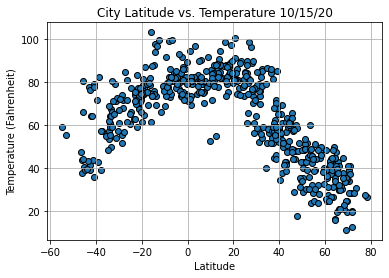

In [125]:
# Build a scatter plot for Latitude vs.Temperature in Fahrenheit
weatherDate = weather_data_values_df['Weather_Date'][0]
plt.scatter(weather_data_values_df["Latitude"], weather_data_values_df["Max_Temp"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Temperature {weatherDate}")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/LatitudeVsTemperature.png")

# Show plot
plt.show()

The Latitude vs. Temperature plot has an unexpected result. As you move north of the equator from a latitude of 0 to a latitude of 80 you see what appears to be a linear decrease in temperature from 70 degrees Fahrenheit to -40 degrees Fahrenheit from 20 degrees latitude to around 80 degrees latitude.

However, we do not see much of a drop moving south of the equator from 0 degrees latitude to around -55 degrees latitude. One reason for this is that there are so few cities in the southern hemisphere, but that can't fully account for the observation since from 0 to -40 we don't see any reduction in temperature (although there are ample cities). This compare to moving from 0 to 40 degrees latitude, where we see around a 40 degree drop in temperature.

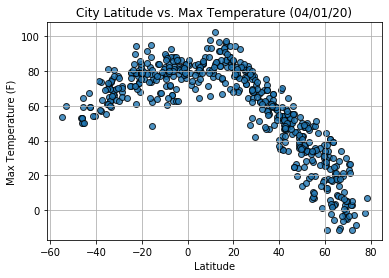

In [10]:
EXAMPLE SOLUTION

## Latitude vs. Humidity Plot

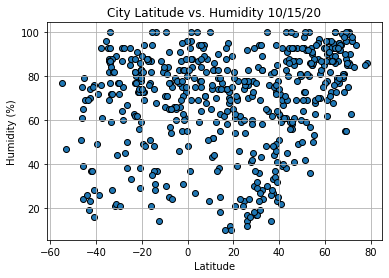

In [126]:
# Build a scatter plot for Latitude vs. Humidity
plt.scatter(weather_data_values_df["Latitude"], weather_data_values_df["Humidity"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity {weatherDate}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/LatitudeVsHumidity.png")

# Show plot
plt.show()


The Latitude vs. Humidity plot does not seem to have a strong correlation to latitude. One can say however, that it appears more cities have a humidity above 60% than a humidity below 60%. It will be interesting to see if grouping by Northern vs. Southern Hemispheres will tease this cluster apart to reveal a trend.

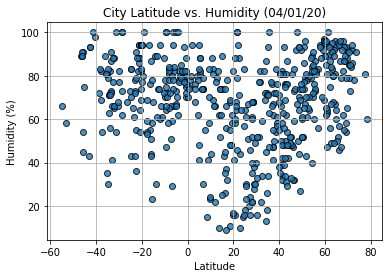

In [11]:
EXAMPLE SOLUTION

## Latitude vs. Cloudiness Plot

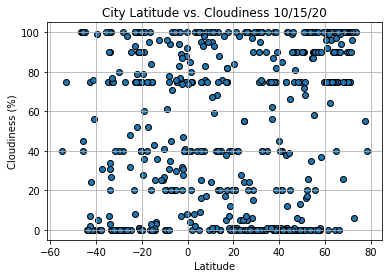

In [127]:
# Build a scatter plot for Latitude vs. Cloudiness
plt.scatter(weather_data_values_df["Latitude"], weather_data_values_df["Cloudiness"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness {weatherDate}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/LatitudeVsCloudiness.png")

# Show plot
plt.show()

The Latitude vs. Cloudiness plot does not seem to have any correlation to latitude. One can say however, that there seems to be a collection of points across all latitudes at either 0%, 75% or 100% Cloudy. I'd be curious if this measure is subjective or objective. I'd expect a subjective assesment to yield more 0%,25%,50% and 100% observations. An objective assesment would have a more even distribution. Given the "lines" we see at discreet %Cloudiness levels across all latitudes, I'd guess this measure is a subjective measurement.

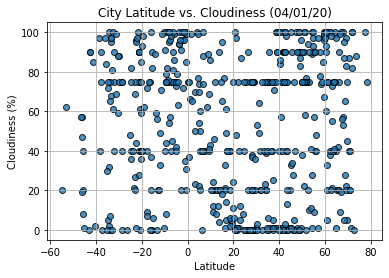

In [12]:
EXAMPLE SOLUTION

## Latitude vs. Wind Speed Plot

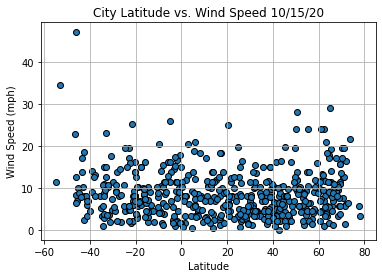

In [128]:
# Build a scatter plot for Latitude vs. Wind Speed
plt.scatter(weather_data_values_df["Latitude"], weather_data_values_df["Wind_Speed"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed {weatherDate}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/LatitudeVsWindSpeed.png")

# Show plot
plt.show()

The Latitude vs. Wind Speed scatterplot suggests there is no correlation between Wind Speed and Latitude. One can say that regardless of latitude we see the vast majority of wind speed between 0-20 mph, with most of those falling into the 0-10 mph range.

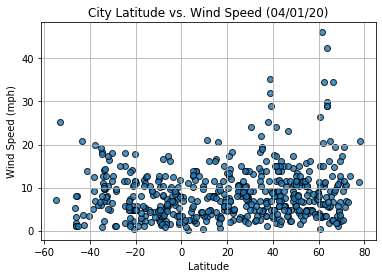

In [13]:
EXAMPLE SOLUTION

## Linear Regression

In [129]:
#Create Linear Regression plots
def make_lin_reg_plot(x_values,y_values,x_desc,y_desc,hemisphere,filename,x_ann,y_ann):
    # Print out the r-squared value along with the plot.
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values,edgecolors='black')
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"{hemisphere}-\nCity {x_desc} vs. {y_desc} {weatherDate}")
    plt.annotate(line_eq,(x_ann,y_ann),fontsize=15,color="red")
    plt.xlabel(x_desc)
    plt.ylabel(y_desc)
    print(f"The r-value is: {rvalue}")
    print(line_eq)
    plt.savefig(f'Images/{filename}')
    plt.show()

In [130]:
#Create Northern and Southern Hemisphere Dataframes
# store the boolean criteria in a variable to pass to the dataframe indexing function
crit_north = weather_data_values_df.Latitude >= 0
crit_south = weather_data_values_df.Latitude < 0

# Create the north and south hemisphere dataframes using boolean indexing from the criteria from above 
north_weather = weather_data_values_df[crit_north]
south_weather = weather_data_values_df[crit_south]

# The indexes will not be continuous so they need to be reset with the drop=True argument so we don't make
# the prior index as a column
north_weather = north_weather.reset_index(drop=True)
south_weather = south_weather.reset_index(drop=True)
#north_weather.head()
#south_weather.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8723328672831614
y = -0.92x + 94.41


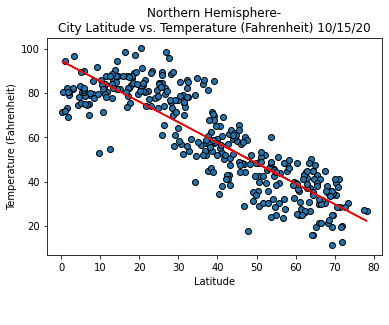

In [131]:
make_lin_reg_plot(north_weather["Latitude"],north_weather["Max_Temp"],\
                  'Latitude','Temperature (Fahrenheit)','Northern Hemisphere',\
                 'NorthHemiLatVsTemp.png',6,-20)

This scatterplot with linear regression has and r-squared value of -0.87, so there is a strong negative linear relationship between decreasing latitude and decreasing temperature in the Northern Hemisphere. This means 87% of the variance is explained by this linear model, which is very good. Keep in mind that if the model explained 100% of the variance, all the points would have to be on the curve.

The r-value is: 0.46937863826630627


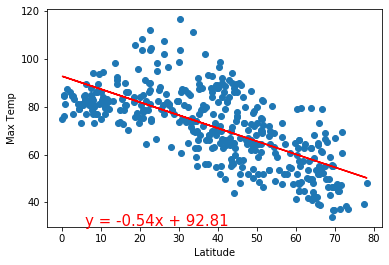

In [25]:
EXAMPLE SOLUTION

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6916587416714134
y = 0.68x + 85.9


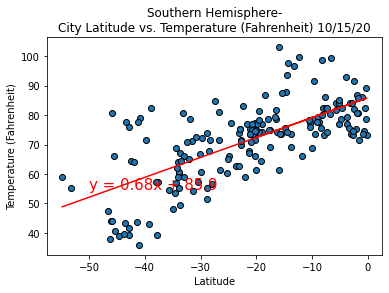

In [132]:
make_lin_reg_plot(south_weather["Latitude"],south_weather["Max_Temp"],\
                  'Latitude',f'Temperature (Fahrenheit)','Southern Hemisphere',\
                 'SouthHemiLatVsTemp.png',-50,55)

This scatter plot shows a weaker relationship between temperature and latitude in the Southern Hemisphere, with an r-squared value of 0.69. This means the linear curve fit can only account for 69% of the variance seen in the data. So, there seems to be a correlation.

The r-value is: 0.6082708688906918


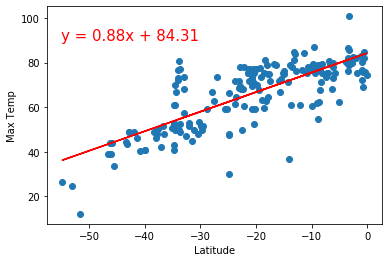

In [26]:
EXAMPLE SOLUTION

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3091256870414836
y = 0.34x + 57.21


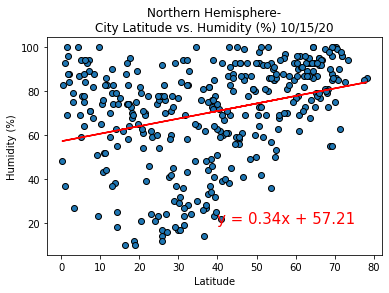

In [133]:
make_lin_reg_plot(north_weather["Latitude"],north_weather["Humidity"],\
                  'Latitude',f'Humidity (%)','Northern Hemisphere',\
                 'NorthHemiLatVsHumidity.png',40,20)

This scatter plot shows a very weak relationship between latitude and humidity in the Northern Hemisphere with an r-squared value of 0.309. This means the linear curve fit can only account for 31% of the variance seen in the data, leaving the vast majority of the variance unexplained by the equation of the line y = 0.34x + 57.21. So, although there seems to be a correlation it is very weak and there is little correlation between latitude and humidity in the Northern Hemisphere.

The r-value is: 0.000543987878808455


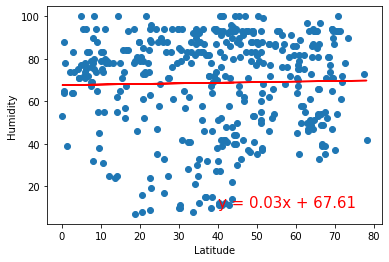

In [27]:
EXAMPLE SOLUTION

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.15206233096548769
y = 0.24x + 73.03


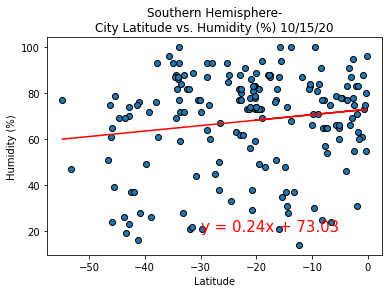

In [134]:
make_lin_reg_plot(south_weather["Latitude"],south_weather["Humidity"],\
                  'Latitude',f'Humidity (%)','Southern Hemisphere',\
                 'SouthHemiLatVsHumidity.png',-30,20)

In the Southern Hemisphere there is a weak correlation between latitude and humidity. The linear regression has an r-squared value of 0.15 - meaning 15% of the variance in the data is explained by the curve fit. This is not a strong correlation, but rather a weak one, but we can't say there is no correlation. Other factors play the majority of the role in the change in humidity.

The r-value is: 0.014985174297345524


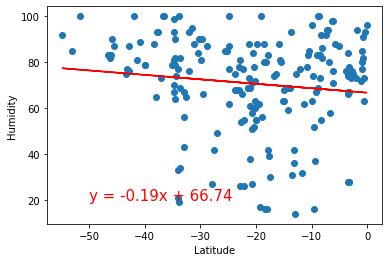

In [28]:
EXAMPLE SOLUTION

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2683186595808818
y = 0.53x + 30.82


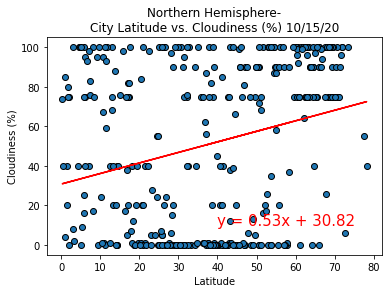

In [135]:
make_lin_reg_plot(north_weather["Latitude"],north_weather["Cloudiness"],\
                  'Latitude',f'Cloudiness (%)','Northern Hemisphere',\
                 'NorthHemiLatVsCloudiness.png',40,10)

In the Northern Hemisphere there does not seem to be a significant correlation between latitude and cloudiness. The linear regression curve fit yields an equation of the line with an r-squared value of only 0.268 - meaning the linear equation of the line only explains 27% of the variance seen. Visually we can confirm what the math indicates - that there is really no correlation between the latitude and cloudiness in the Northern Hemisphere.

The r-value is: 0.0020898727664228514


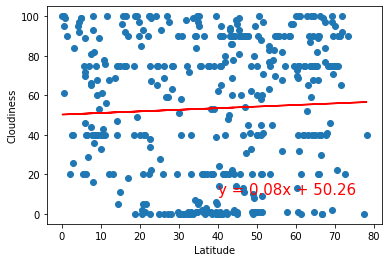

In [29]:
EXAMPLE SOLUTION

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0804289445407622
y = 0.23x + 52.31


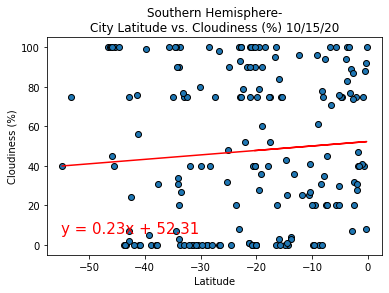

In [136]:
make_lin_reg_plot(south_weather["Latitude"],south_weather["Cloudiness"],\
                  'Latitude',f'Cloudiness (%)','Southern Hemisphere',\
                 'SouthHemiLatVsCloudiness.png',-55,6)

In the Southern Hemisphere, latitude weakly correlates with cloudiness with and equation of the linear regression yielding an r-squared value of 0.08 - or 8% of the variance of the observed data can be accounted for by the equation of the linear regression line. This is a weak correlation.

The r-value is: 0.0035263772085582894


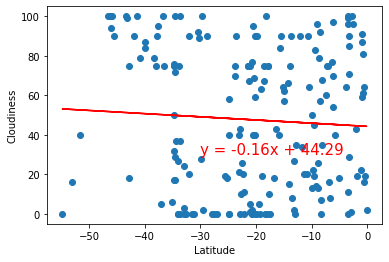

In [30]:
EXAMPLE SOLUTION

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.14464301136925448
y = 0.04x + 6.81


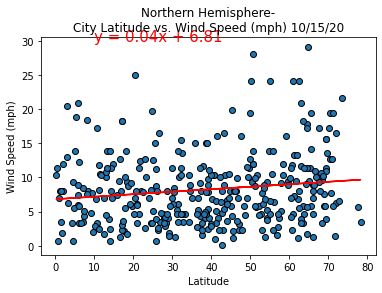

In [137]:
make_lin_reg_plot(north_weather["Latitude"],north_weather["Wind_Speed"],\
                  'Latitude',f'Wind Speed (mph)','Northern Hemisphere',\
                 'NorthHemiLatVsWindSpeed.png',10,30)

The linear regression gives r-squared value of 0.14. Only 14% of the variance can be accounted for by the equation of the line - so for all practical purposes there is not a linear correlation between these two factors.

The r-value is: 0.04019723576144484


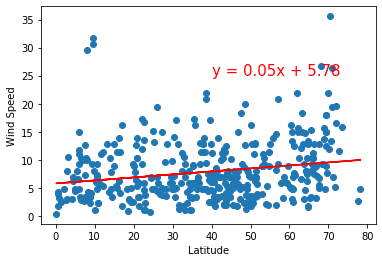

In [31]:
EXAMPLE SOLUTION

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.15008159338440472
y = -0.07x + 7.75


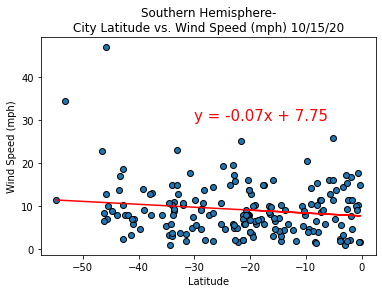

In [138]:
make_lin_reg_plot(south_weather["Latitude"],south_weather["Wind_Speed"],\
                  'Latitude',f'Wind Speed (mph)','Southern Hemisphere',\
                 'SouthHemiLatVsWindSpeed.png',-30,30)

In the Southern Hemisphere we see a much stronger correlation between latitude and wind speed with an r-squared value of -0.15. But this is weak and it is saying that the majority of the variance cannot be explained by the linear regression curve fit. 

The r-value is: 0.017128274759839232


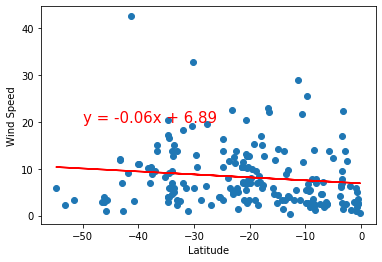

In [32]:
EXAMPLE SOLUTION